In [63]:
import torch
from unet import UNet
from torchvision.io import read_image, ImageReadMode
from PIL import  Image
import matplotlib.pyplot as plt

In [80]:
model = UNet(n_channels=1, n_classes=15)
weights = torch.load("checkpoints/checkpoint_epoch1.pth", weights_only=False)
weights.popitem("mask_values")

('mask_values', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [81]:
model.load_state_dict(weights)

<All keys matched successfully>

In [82]:
@torch.no_grad()
def infer(model, img_path):
	model.eval()
	img = read_image(img_path, mode=ImageReadMode.GRAY).float().unsqueeze(0)
	out = model(img).argmax(axis=1).squeeze()
	# img = Image.fromarray(out.squeeze(0).numpy())
	return out

out = infer(model, "/home/phthphat/Desktop/dental/expriment/wandb/latest-run/files/media/images/images_2722_82a160480e2b6057ba7a.png")

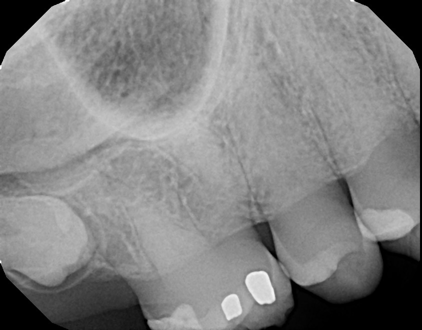

In [85]:
Image.open("/home/phthphat/Desktop/dental/expriment/wandb/latest-run/files/media/images/images_2722_82a160480e2b6057ba7a.png")

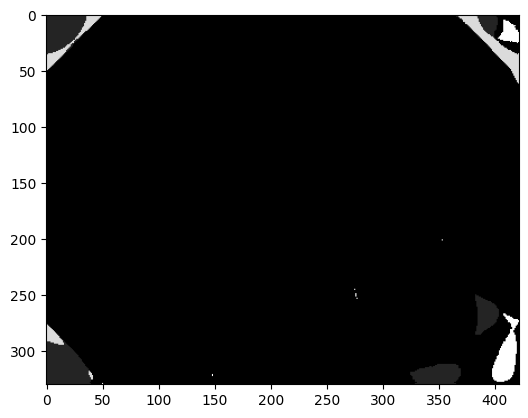

In [84]:
Image.fromarray(out)